In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Load dataset

In [2]:
df=pd.read_csv('ipl.csv')

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_13128\3116946118.py:1: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('ipl.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   match_id           278205 non-null  int64  
 1   season             278205 non-null  object 
 2   date               278205 non-null  object 
 3   city               265808 non-null  object 
 4   venue              278205 non-null  object 
 5   team1              278205 non-null  object 
 6   team2              278205 non-null  object 
 7   toss_winner        278205 non-null  object 
 8   toss_decision      278205 non-null  object 
 9   winner             273503 non-null  object 
 10  result             278205 non-null  object 
 11  result_margin      278205 non-null  object 
 12  player_of_match    277399 non-null  object 
 13  inning             278205 non-null  int64  
 14  batting_team       278205 non-null  object 
 15  bowling_team       278205 non-null  object 
 16  ov

In [4]:
df.isnull().sum()

match_id                  0
season                    0
date                      0
city                  12397
venue                     0
team1                     0
team2                     0
toss_winner               0
toss_decision             0
winner                 4702
result                    0
result_margin             0
player_of_match         806
inning                    0
batting_team              0
bowling_team              0
over                      0
ball                      0
batter                    0
bowler                    0
non_striker               0
runs_scored               0
extras                    0
current_score             0
wickets_down              0
balls_remaining           0
wickets_remaining         0
current_run_rate          0
required_run_rate    144302
target_score         144302
wicket_kind          264382
player_out           264382
fielder              268192
dtype: int64

In [5]:
df['current_score']

0           1
1           1
2           2
3           2
4           2
         ... 
278200    199
278201    200
278202    201
278203    202
278204    208
Name: current_score, Length: 278205, dtype: int64

In [6]:
import pandas as pd

team_rename_dict = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Deccan Chargers': 'Sunrisers Hyderabad'
}
df['batting_team'] = df['batting_team'].replace(team_rename_dict)
df['bowling_team'] = df['bowling_team'].replace(team_rename_dict)

active_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Kolkata Knight Riders', 
    'Mumbai Indians', 'Punjab Kings', 'Rajasthan Royals', 
    'Royal Challengers Bengaluru', 'Sunrisers Hyderabad', 
    'Lucknow Super Giants', 'Gujarat Titans'
]

df = df[df['batting_team'].isin(active_teams)]
df = df[df['bowling_team'].isin(active_teams)]

print(f"Dataset now contains {df['batting_team'].nunique()} active teams.")                                     

Dataset now contains 10 active teams.


In [7]:
df['winner'].isnull().sum()

np.int64(4376)

In [8]:
df = df[df['inning']==2]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set professional visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_13128\4103064276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')


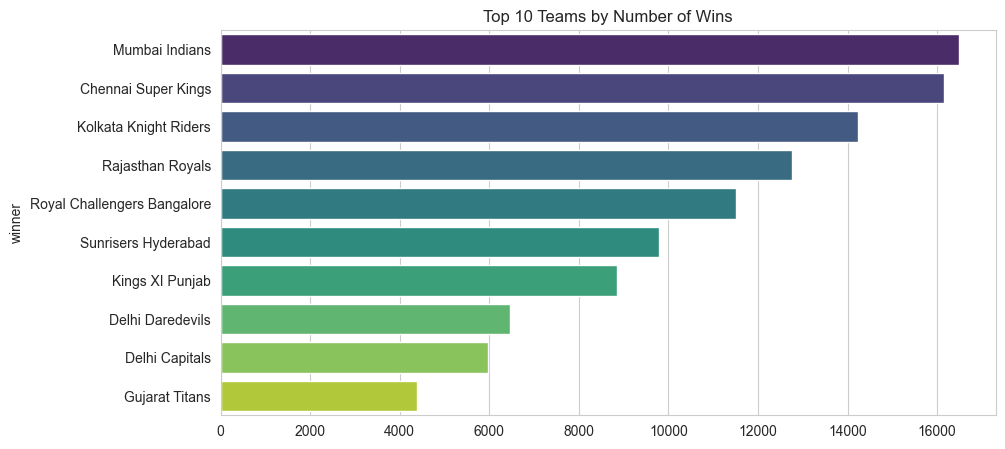

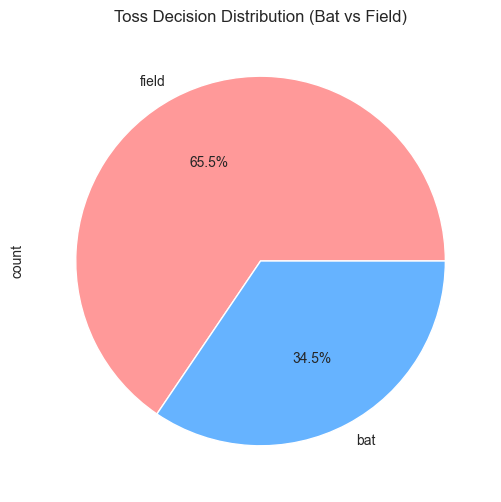

In [10]:
plt.figure(figsize=(10,5))
top_teams = df['winner'].value_counts().head(10)
sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')
plt.title("Top 10 Teams by Number of Wins")
plt.show()

plt.figure(figsize=(6,6))
df.drop_duplicates('match_id')['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Toss Decision Distribution (Bat vs Field)")
plt.show()

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_13128\3793240926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_target.values, y=avg_target.index, palette='magma')


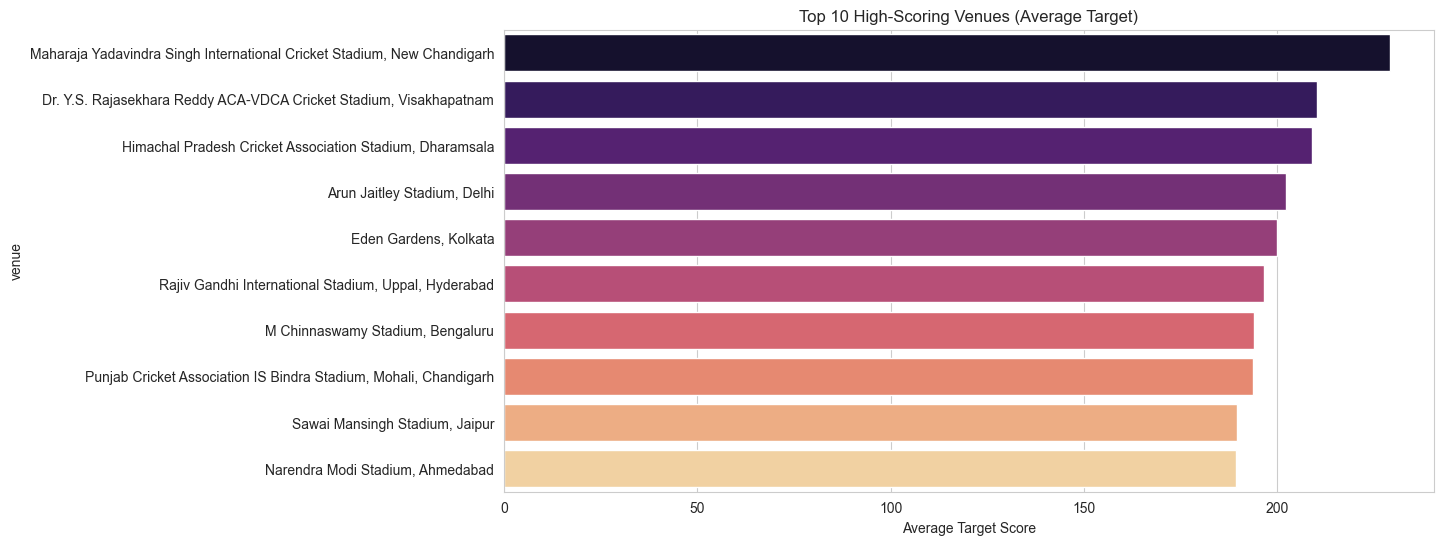

In [11]:
plt.figure(figsize=(12, 6))
avg_target = df.groupby('venue')['target_score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_target.values, y=avg_target.index, palette='magma')
plt.title("Top 10 High-Scoring Venues (Average Target)")
plt.xlabel("Average Target Score")
plt.show()

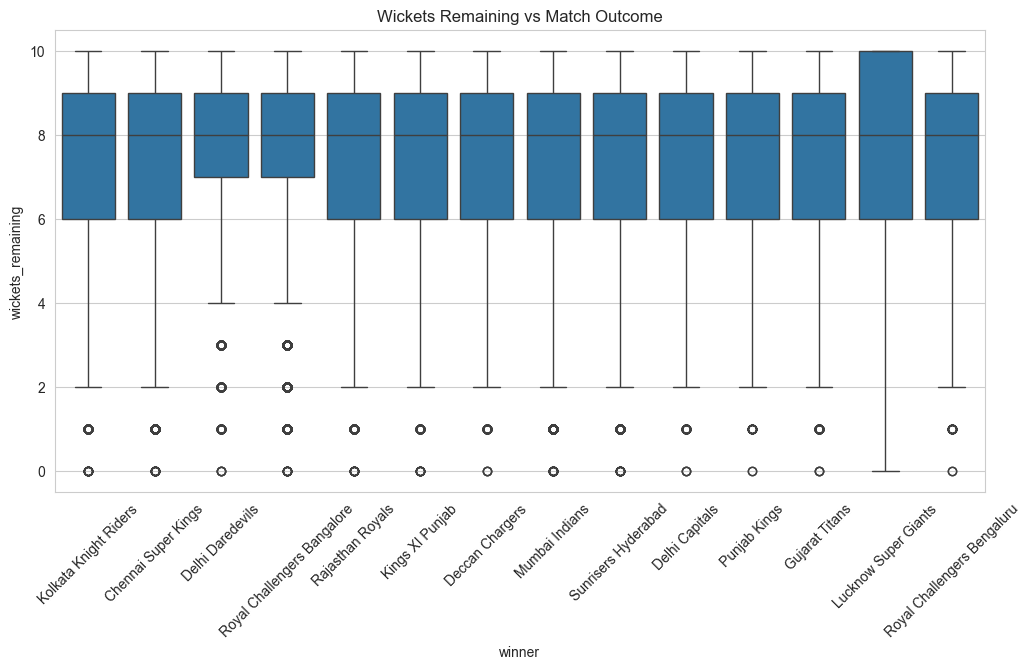

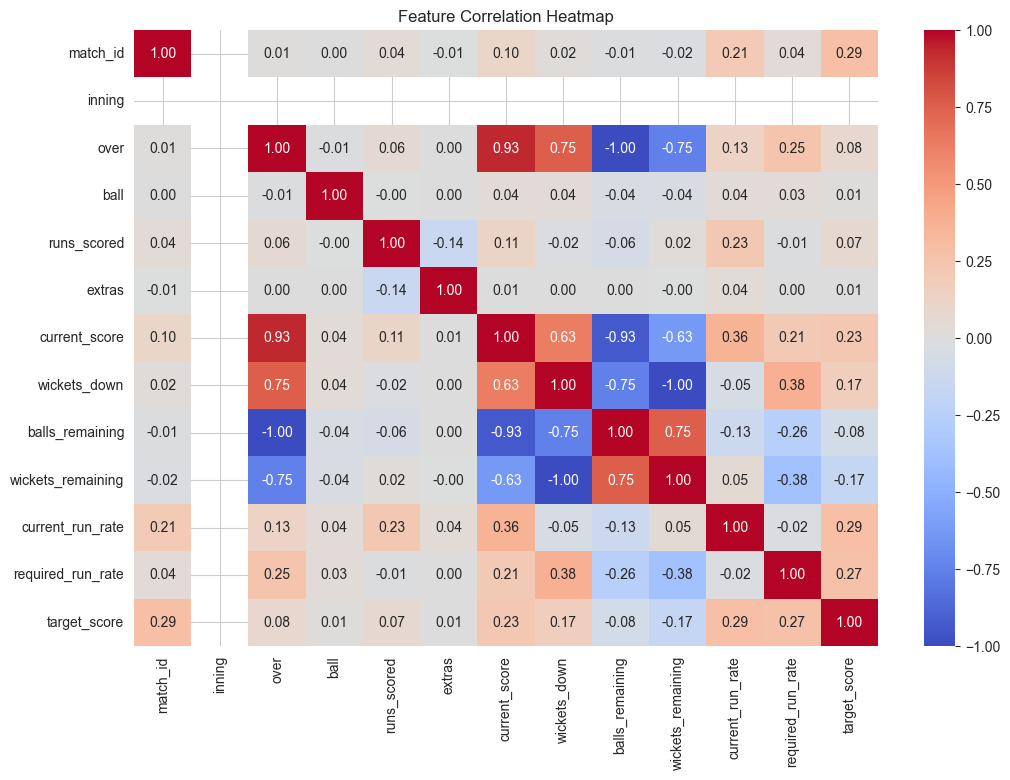

In [12]:
sns.boxplot(x='winner', y='wickets_remaining', data=df)
plt.title("Wickets Remaining vs Match Outcome")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12, 8))
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
df

,match_id,season,date,city,venue,team1,team2,toss_winner,toss_decision,winner,...,current_score,wickets_down,balls_remaining,wickets_remaining,current_run_rate,required_run_rate,target_score,wicket_kind,player_out,fielder
124,335982,2007/08,4/18/2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,...,1,0,119,10,6.00,11.19,223.0,NaN,NaN,NaN
125,335982,2007/08,4/18/2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,...,2,0,119,10,12.00,11.14,223.0,NaN,NaN,NaN
126,335982,2007/08,4/18/2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,...,2,0,118,10,6.00,11.24,223.0,NaN,NaN,NaN
127,335982,2007/08,4/18/2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,...,3,0,117,10,6.00,11.28,223.0,NaN,NaN,NaN
128,335982,2007/08,4/18/2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,...,4,0,116,10,6.00,11.33,223.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278200,1485779,2025,5/24/2025,Jaipur,"Sawai Mansingh Stadium, Jaipur",Punjab Kings,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,...,199,4,6,6,10.47,8.00,207.0,NaN,NaN,NaN
278201,1485779,2025,5/24/2025,Jaipur,"Sawai Mansingh Stadium, Jaipur",Punjab Kings,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,...,200,4,6,6,10.53,7.00,207.0,NaN,NaN,NaN
278202,1485779,2025,5/24/2025,Jaipur,"Sawai Mansingh Stadium, Jaipur",Punjab Kings,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,...,201,4,5,6,10.49,7.20,207.0,NaN,NaN,NaN
278203,1485779,2025,5/24/2025,Jaipur,"Sawai Mansingh Stadium, Jaipur",Punjab Kings,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,...,202,4,4,6,10.45,7.50,207.0,NaN,NaN,NaN


In [14]:
df['runs_left'] = df['target_score'] - df['current_score']

In [15]:
df['balls_left'] = 120 - (df['over']*6 + df['ball'])

In [16]:
match_outcomes = df.drop_duplicates('match_id')[['venue', 'result']]

chase_wins_per_venue = match_outcomes[match_outcomes['result'] == 'wickets'].groupby('venue').size()
total_matches_per_venue = match_outcomes.groupby('venue').size()

venue_chase_map = (chase_wins_per_venue / total_matches_per_venue * 100).fillna(0).to_dict()

df['venue_chase_pct'] = df['venue'].map(venue_chase_map)

In [17]:
df.isnull().sum()

match_id                  0
season                    0
date                      0
city                   6012
venue                     0
team1                     0
team2                     0
toss_winner               0
toss_decision             0
winner                 1775
result                    0
result_margin             0
player_of_match          34
inning                    0
batting_team              0
bowling_team              0
over                      0
ball                      0
batter                    0
bowler                    0
non_striker               0
runs_scored               0
extras                    0
current_score             0
wickets_down              0
balls_remaining           0
wickets_remaining         0
current_run_rate          0
required_run_rate         0
target_score              0
wicket_kind          114956
player_out           114956
fielder              116665
runs_left                 0
balls_left                0
venue_chase_pct     

In [18]:
df.shape

(120967, 36)

In [19]:
df = df.dropna(subset=['winner'])

In [20]:
df.shape

(119192, 36)

In [21]:
df.isnull().sum()

match_id                  0
season                    0
date                      0
city                   5641
venue                     0
team1                     0
team2                     0
toss_winner               0
toss_decision             0
winner                    0
result                    0
result_margin             0
player_of_match           0
inning                    0
batting_team              0
bowling_team              0
over                      0
ball                      0
batter                    0
bowler                    0
non_striker               0
runs_scored               0
extras                    0
current_score             0
wickets_down              0
balls_remaining           0
wickets_remaining         0
current_run_rate          0
required_run_rate         0
target_score              0
wicket_kind          113274
player_out           113274
fielder              114957
runs_left                 0
balls_left                0
venue_chase_pct     

In [22]:

df['is_wicket'] = df['player_out'].notnull().astype(int)

groups = df.groupby('match_id')
wickets_last_five = []
df['last_5_over_wickets'] = df.groupby('match_id')['is_wicket']\
                              .rolling(window=30, min_periods=30)\
                              .sum()\
                              .reset_index(level=0, drop=True)

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_13128\4160820548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_wicket'] = df['player_out'].notnull().astype(int)
C:\Users\Pulkit\AppData\Local\Temp\ipykernel_13128\4160820548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_5_over_wickets'] = df.groupby('match_id')['is_wicket']\


In [23]:
# 2. Identify venues with more than 600 balls (approx 5+ matches)
venue_counts = df['venue'].value_counts()
significant_venues = venue_counts[venue_counts > 600].index.tolist()

# 3. Filter the dataframe
df = df[df['venue'].isin(significant_venues)]

print(f"Number of unique venues remaining: {len(df['venue'].unique())}")

Number of unique venues remaining: 44


In [24]:
groups = df.groupby('match_id')
match_ids = df['match_id'].unique()
last_five = []

for id in match_ids:
    match_group = groups.get_group(id)
    
    # FIX: Select only ['runs_scored'] BEFORE calling .rolling()
    # FIX: Added min_periods=30 so it returns NaN for the first 29 balls
    rolling_sum = match_group['runs_scored'].rolling(window=30, min_periods=30).sum()
    
    last_five.extend(rolling_sum.values.tolist())

df['last_5_over_runs'] = last_five

In [25]:
import numpy as np

df.replace([np.inf, -np.inf], 0, inplace=True)

if 'required_run_rate' in df.columns:
    df['required_run_rate'] = df['required_run_rate'].apply(lambda x: 0 if x > 1000 else x)

df.dropna(subset=['current_run_rate'], inplace=True)

print("Infinity values handled. You can now run pipe.fit().")

Infinity values handled. You can now run pipe.fit().


In [26]:

cols_to_check = ['last_5_over_runs', 'last_5_over_wickets', 'venue_chase_pct']
df.dropna(subset=cols_to_check, inplace=True)

# Verify the remaining rows
print(f"Rows remaining after dropping NaNs: {df.shape[0]}")

Rows remaining after dropping NaNs: 85570


In [27]:

df['partnership_id'] = df.groupby(['match_id', 'inning'])['is_wicket'].cumsum()

df['partnership_runs'] = df.groupby(['match_id', 'inning', 'partnership_id'])['runs_scored'].cumsum()

In [28]:

df['is_pp'] = (df['over'] < 6).astype(int)
df['pp_wicket_count'] = df.groupby(['match_id', 'inning'])['is_wicket'].transform(lambda x: (x * df['is_pp']).cumsum())


In [29]:
def get_roles(group):
    players = pd.concat([group['batter'], group['non_striker']]).drop_duplicates().tolist()
    order_map = {player: i + 1 for i, player in enumerate(players)}
    group['striker_pos'] = group['batter'].map(order_map)
    group['non_striker_pos'] = group['non_striker'].map(order_map)
    return group

df = df.groupby(['match_id', 'inning'], group_keys=False).apply(get_roles)

player_primary_pos = df.groupby('batter')['striker_pos'].agg(lambda x: x.mode().iloc[0]).to_dict()

# 3. Define the role criteria
def map_role(pos):
    if pos <= 3: return 'Top Order'
    elif pos <= 7: return 'Finisher'
    else: return 'Tail-ender'

role_lookup = {player: map_role(pos) for player, pos in player_primary_pos.items()}

df['striker_role'] = df['batter'].map(role_lookup)
df['non_striker_role'] = df['non_striker'].map(role_lookup)

# Fill any missing values for new players with a default
df['striker_role'] = df['striker_role'].fillna('Middle Order')
df['non_striker_role'] = df['non_striker_role'].fillna('Middle Order')

print("Roles successfully assigned based on most frequent batting position!")

Roles successfully assigned based on most frequent batting position!


C:\Users\Pulkit\AppData\Local\Temp\ipykernel_13128\1773535937.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['match_id', 'inning'], group_keys=False).apply(get_roles)


In [30]:

batter_stats = df.groupby('batter').agg({'runs_scored': 'sum', 'match_id': 'count'}).reset_index()
batter_stats.columns = ['batter', 'total_runs', 'balls_faced']
batter_stats['strike_rate'] = (batter_stats['total_runs'] / batter_stats['balls_faced']) * 100
sr_map = batter_stats.set_index('batter')['strike_rate'].to_dict()
df['striker_sr'] = df['batter'].map(sr_map)
df['non_striker_sr'] = df['non_striker'].map(sr_map)

In [31]:
# Assuming your main DataFrame is named 'df'
# This finds the first instance of 'A Kamboj' and prints his strike rate
kamboj_sr = df.loc[df['batter'] == 'A Kamboj', 'striker_sr'].iloc[0]

print(f"A Kamboj Strike Rate: {kamboj_sr}")

A Kamboj Strike Rate: 200.0


In [32]:
df['striker_points'] = df['striker_role'].map({'Finisher': 1.0, 'Top Order': 0.8}).fillna(0)
df['non_striker_points'] = df['non_striker_role'].map({'Finisher': 1.0, 'Top Order': 0.8}).fillna(0)

df['partnership_power'] = (df['striker_points'] + df['non_striker_points']) / 2

In [33]:
df[df['batter']=='A badoni']['striker_role']

Series([], Name: striker_role, dtype: object)

In [34]:
df.isnull().sum()

match_id                   0
season                     0
date                       0
city                    4249
venue                      0
team1                      0
team2                      0
toss_winner                0
toss_decision              0
winner                     0
result                     0
result_margin              0
player_of_match            0
inning                     0
batting_team               0
bowling_team               0
over                       0
ball                       0
batter                     0
bowler                     0
non_striker                0
runs_scored                0
extras                     0
current_score              0
wickets_down               0
balls_remaining            0
wickets_remaining          0
current_run_rate           0
required_run_rate          0
target_score               0
wicket_kind            81019
player_out             81019
fielder                82295
runs_left                  0
balls_left    

In [35]:
import pickle
player_role_map = df.groupby('batter')['striker_role'].last().to_dict()
pickle.dump(player_role_map, open('role_lookup.pkl', 'wb'))

In [36]:
# 1. Dictionary to merge variations of the same stadium
venue_standardization = {
    'M Chinnaswamy Stadium': 'M.Chinnaswamy Stadium',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'Feroz Shah Kotla': 'Arun Jaitley Stadium',
    'Feroz Shah Kotla Ground': 'Arun Jaitley Stadium',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'PCA IS Bindra Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'PCA IS Bindra Stadium',
    'Punjab Cricket Association IS Bindra Stadium': 'PCA IS Bindra Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium': 'Rajiv Gandhi International Stadium',
    'Dubai International Cricket Stadium': 'Dubai',
    'Sheikh Zayed Stadium, Abu Dhabi': 'Abu Dhabi',
    'Zayed Cricket Stadium, Abu Dhabi': 'Abu Dhabi',
    'Sharjah Cricket Stadium': 'Sharjah',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Saurashtra Cricket Association Stadium, Rajkot': 'Saurashtra Cricket Association Stadium',
    'Holkar Cricket Stadium, Indore': 'Holkar Cricket Stadium'
}

# 2. Apply the mapping to the venue column
df['venue'] = df['venue'].replace(venue_standardization)

# 3. Important: Recalculate your venue_chase_map with standardized names
match_outcomes = df.drop_duplicates('match_id')[['venue', 'result']]
chase_wins_per_venue = match_outcomes[match_outcomes['result'] == 'wickets'].groupby('venue').size()
total_matches_per_venue = match_outcomes.groupby('venue').size()

venue_chase_map = (chase_wins_per_venue / total_matches_per_venue * 100).fillna(0).to_dict()

# 4. Save the new assets for Streamlit
import pickle
venues = sorted(df['venue'].unique().tolist())
pickle.dump(venues, open('venues.pkl', 'wb'))
pickle.dump(venue_chase_map, open('venue_chase.pkl', 'wb'))

print(f"Standardized down to {len(venues)} unique venues.")

Standardized down to 32 unique venues.


In [37]:
teams = sorted(df['batting_team'].unique().tolist())
venues = sorted(df['venue'].unique().tolist())

pickle.dump(teams, open('teams.pkl', 'wb'))

In [38]:
# 1. Prepare match-level data
match_data = df[['match_id', 'venue', 'date', 'result']].drop_duplicates('match_id').copy()

# FIX: Convert 'result' to numeric. 
# In IPL data, 'wickets' means the team batting second (chasing) won.
match_data['result_binary'] = (match_data['result'] == 'wickets').astype(int)

# Ensure date is in datetime format and sorted
match_data['date'] = pd.to_datetime(match_data['date'])
match_data = match_data.sort_values('date')

# 2. Calculate the expanding mean using the NEW binary column
match_data['venue_chase_pct'] = (
    match_data.groupby('venue')['result_binary']
    .apply(lambda x: x.expanding().mean().shift(1) * 100)
    .reset_index(level=0, drop=True)
)

# 3. Map back to main dataframe
venue_chase_roll_dict = match_data.set_index(['match_id', 'venue'])['venue_chase_pct'].to_dict()
df['venue_chase_pct'] = df.set_index(['match_id', 'venue']).index.map(venue_chase_roll_dict)

# 4. Fill NaNs with global average of the binary results
global_chase_avg = match_data['result_binary'].mean() * 100
df['venue_chase_pct'] = df['venue_chase_pct'].fillna(global_chase_avg)

print("Success: Venue Chase Pct calculated using numeric binary results.")

Success: Venue Chase Pct calculated using numeric binary results.


In [39]:

all_matches = df.drop_duplicates('match_id')
team_wins = all_matches['winner'].value_counts()
team_matches = all_matches['batting_team'].value_counts() + all_matches['bowling_team'].value_counts()
team_win_pct_map = (team_wins / team_matches * 100).to_dict()
pickle.dump(team_win_pct_map, open('team_win_pct_map.pkl', 'wb'))
df['batting_team_win_pct'] = df['batting_team'].map(team_win_pct_map)
df['bowling_team_win_pct'] = df['bowling_team'].map(team_win_pct_map)

In [40]:
df['result'] = df.apply(lambda row: 1 if str(row['batting_team']) == str(row['winner']) else 0, axis=1)

In [41]:
df=df[['batting_team_win_pct', 'bowling_team_win_pct', 'venue_chase_pct', # New Numeric Stats
    'runs_left', 'balls_left', 'wickets_remaining', 'current_run_rate', 
    'required_run_rate', 'last_5_over_runs', 'last_5_over_wickets', 
    'pp_wicket_count', 'striker_sr', 'non_striker_sr', 
    'partnership_power', 'striker_role', 'non_striker_role','result']]

In [42]:
df.shape

(85570, 17)

In [43]:
df.isnull().sum()   

batting_team_win_pct     0
bowling_team_win_pct     0
venue_chase_pct          0
runs_left                0
balls_left               0
wickets_remaining        0
current_run_rate         0
required_run_rate        0
last_5_over_runs         0
last_5_over_wickets      0
pp_wicket_count          0
striker_sr               0
non_striker_sr          12
partnership_power        0
striker_role             0
non_striker_role         0
result                   0
dtype: int64

In [44]:
df.dropna(subset=['striker_sr', 'non_striker_sr'], inplace=True)

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler



In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler



categorical_cols = ['striker_role', 'non_striker_role']
numerical_cols = [col for col in df.columns if col not in categorical_cols]
numerical_cols.remove('batting_team_win_pct')
numerical_cols.remove('bowling_team_win_pct')
numerical_cols.remove('result')
numerical_cols.remove('pp_wicket_count')
numerical_cols.remove('balls_left')
numerical_cols.remove('runs_left')
# 2. Advanced Transformer: Scales numbers AND encodes text
trf = ColumnTransformer([
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols),
    ('num',StandardScaler(),numerical_cols)
], remainder='passthrough')

# 3. Create the Pipeline
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver='liblinear', max_iter=4000))
])

In [48]:
import numpy as np

df['balls_per_run'] = df['balls_left'] / (df['runs_left'] + 1)

df['current_run_rate'] = df['current_run_rate'].fillna(0)
df['required_run_rate'] = df['required_run_rate'].fillna(0)

df = df.replace([np.inf, -np.inf], np.nan) # First convert inf to NaN

df['balls_per_run'] = df['balls_per_run'].fillna(0)

df['balls_per_run'] = df['balls_per_run'].clip(upper=10.0)
df['required_run_rate'] = df['required_run_rate'].clip(upper=36.0)


In [49]:
df['balls_per_run'].isnull().sum()

np.int64(0)

In [50]:
df['balls_per_run'].dropna()

153       0.460000
154       0.455000
155       0.450000
156       0.445000
157       0.440000
            ...   
278200    0.666667
278201    0.625000
278202    0.571429
278203    0.500000
278204    0.000000
Name: balls_per_run, Length: 85558, dtype: float64

In [51]:
# 1. DO NOT overwrite 'winner'. Create a new column 'result'
# This ensures that even if you run this cell twice, it won't break.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 2. Check if you have both classes now


df['pressure_index'] = df['required_run_rate'] / (df['current_run_rate'] + 0.1)

df['pressure_index'] = df['pressure_index'].clip(upper=10)

# 3. Update your features list (Removing partnership_runs as requested)
df['batting_team_win_pct'] = np.log1p(df['batting_team_win_pct'])*0.00000
df['bowling_team_win_pct'] = np.log1p(df['bowling_team_win_pct'])*0.0000
features = [
    'batting_team_win_pct', 'bowling_team_win_pct', 'venue_chase_pct', # New Numeric Stats
    'balls_per_run',
    'wickets_remaining', 'current_run_rate', 
    'required_run_rate', 'last_5_over_runs', 'last_5_over_wickets', 
     'striker_sr', 'non_striker_sr', 
    'partnership_power', 'striker_role', 'non_striker_role', 'pressure_index'
]

X = df[features]
y = df['result']

# 4. Re-train and save
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [52]:
X_train.isnull().sum()

batting_team_win_pct    0
bowling_team_win_pct    0
venue_chase_pct         0
balls_per_run           0
wickets_remaining       0
current_run_rate        0
required_run_rate       0
last_5_over_runs        0
last_5_over_wickets     0
striker_sr              0
non_striker_sr          0
partnership_power       0
striker_role            0
non_striker_role        0
pressure_index          0
dtype: int64

In [53]:
X_train.dropna()

,batting_team_win_pct,bowling_team_win_pct,venue_chase_pct,balls_per_run,wickets_remaining,current_run_rate,required_run_rate,last_5_over_runs,last_5_over_wickets,striker_sr,non_striker_sr,partnership_power,striker_role,non_striker_role,pressure_index
33589,0.0,0.0,66.666667,0.719626,9,8.09,8.26,39.0,1.0,124.632953,143.967280,0.9,Top Order,Finisher,1.008547
65940,0.0,0.0,66.666667,0.296296,5,6.88,20.00,24.0,3.0,158.974359,117.088608,0.4,Tail-ender,Top Order,2.865330
237274,0.0,0.0,25.000000,0.716667,7,9.64,8.21,40.0,3.0,139.252336,137.410072,0.8,Top Order,Top Order,0.842916
227130,0.0,0.0,53.286148,0.975610,10,9.90,6.00,53.0,0.0,130.703625,132.551799,0.8,Top Order,Top Order,0.600000
84532,0.0,0.0,60.000000,0.742857,7,7.15,7.96,21.0,1.0,115.789474,121.317829,0.8,Top Order,Top Order,1.097931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117509,0.0,0.0,40.000000,0.753623,7,7.15,7.85,37.0,0.0,132.551799,131.400166,0.9,Top Order,Finisher,1.082759
2795,0.0,0.0,0.000000,0.833333,9,7.70,7.10,36.0,1.0,130.572391,152.317881,0.9,Finisher,Top Order,0.910256
57342,0.0,0.0,58.823529,1.147059,8,7.11,5.08,23.0,1.0,146.428571,104.925054,0.9,Top Order,Finisher,0.704577
30638,0.0,0.0,0.000000,0.720430,9,9.06,8.24,46.0,0.0,140.217391,140.419447,0.8,Top Order,Top Order,0.899563


In [54]:
X_train.isnull().sum()

batting_team_win_pct    0
bowling_team_win_pct    0
venue_chase_pct         0
balls_per_run           0
wickets_remaining       0
current_run_rate        0
required_run_rate       0
last_5_over_runs        0
last_5_over_wickets     0
striker_sr              0
non_striker_sr          0
partnership_power       0
striker_role            0
non_striker_role        0
pressure_index          0
dtype: int64

In [55]:
pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('step1', ...), ('step2', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [56]:
from sklearn.metrics import accuracy_score,classification_report
y_pred=pipe.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7303062178588126
              precision    recall  f1-score   support

           0       0.76      0.81      0.79     10490
           1       0.67      0.60      0.63      6622

    accuracy                           0.73     17112
   macro avg       0.72      0.71      0.71     17112
weighted avg       0.73      0.73      0.73     17112



In [57]:
from sklearn.metrics import accuracy_score, classification_report, log_loss, roc_auc_score, brier_score_loss

# 1. Get hard predictions (0 or 1)
y_pred = pipe.predict(X_test)

# 2. Get probability estimates (The 'Win' probability is the second column)
y_probs = pipe.predict_proba(X_test)[:, 1]

# 3. Calculate metrics
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC Score:  {roc_auc_score(y_test, y_probs):.4f}")
print(f"Log Loss:       {log_loss(y_test, y_probs):.4f}")
print(f"Brier Score:    {brier_score_loss(y_test, y_probs):.4f}")

# 4. Detailed Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7303
ROC-AUC Score:  0.7901
Log Loss:       0.5361
Brier Score:    0.1823

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79     10490
           1       0.67      0.60      0.63      6622

    accuracy                           0.73     17112
   macro avg       0.72      0.71      0.71     17112
weighted avg       0.73      0.73      0.73     17112



c:\Users\Pulkit\ipl win predictor _second innings\venv\Lib\site-packages\sklearn\utils\_plotting.py:176: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


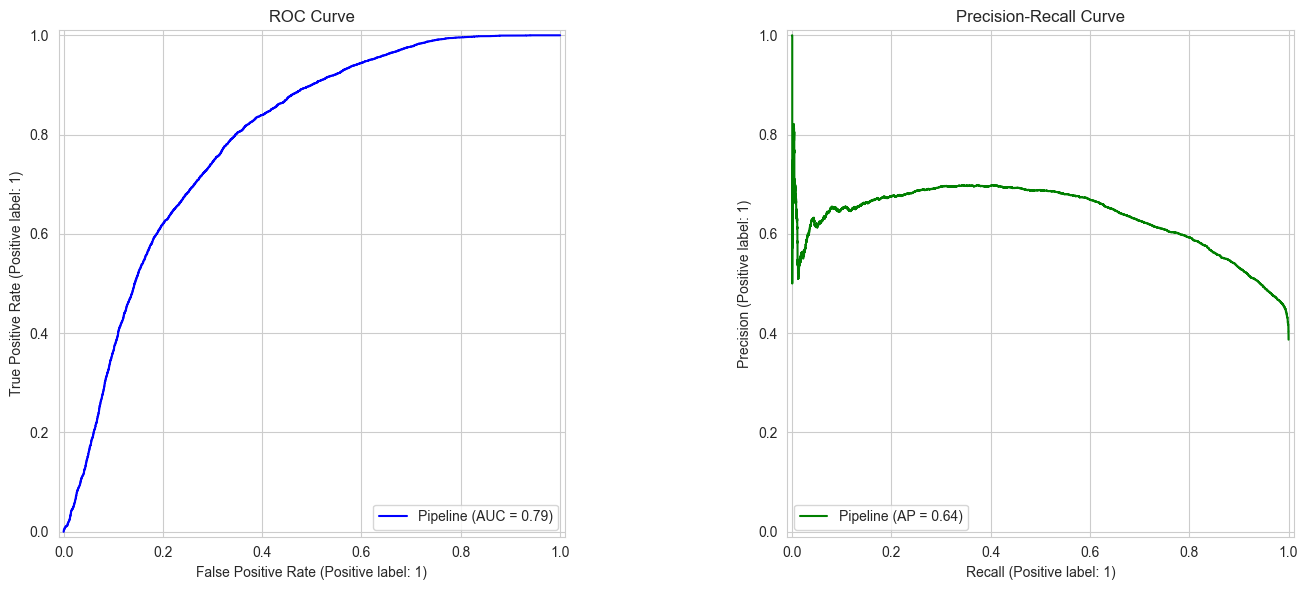

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot ROC Curve
RocCurveDisplay.from_estimator(pipe, X_test, y_test, ax=ax1, color='blue')
ax1.set_title("ROC Curve")

# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(pipe, X_test, y_test, ax=ax2, color='green')
ax2.set_title("Precision-Recall Curve")

plt.tight_layout()
plt.show()

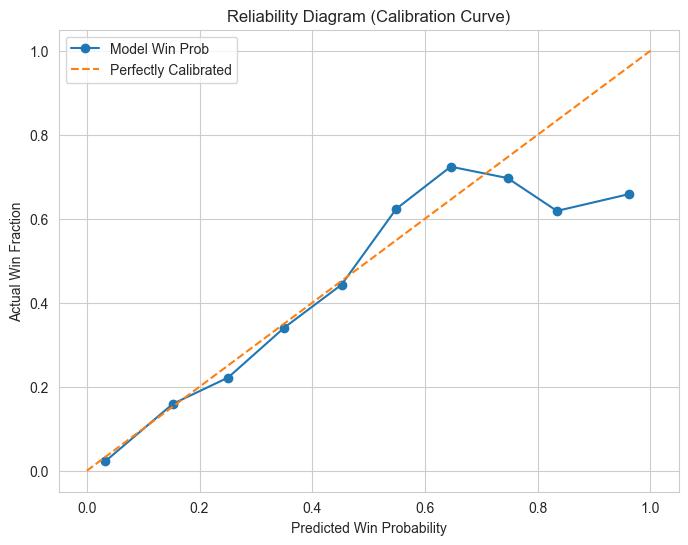

In [59]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label="Model Win Prob")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfectly Calibrated")
plt.xlabel("Predicted Win Probability")
plt.ylabel("Actual Win Fraction")
plt.title("Reliability Diagram (Calibration Curve)")
plt.legend()
plt.show()

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_13128\3221285290.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='magma')


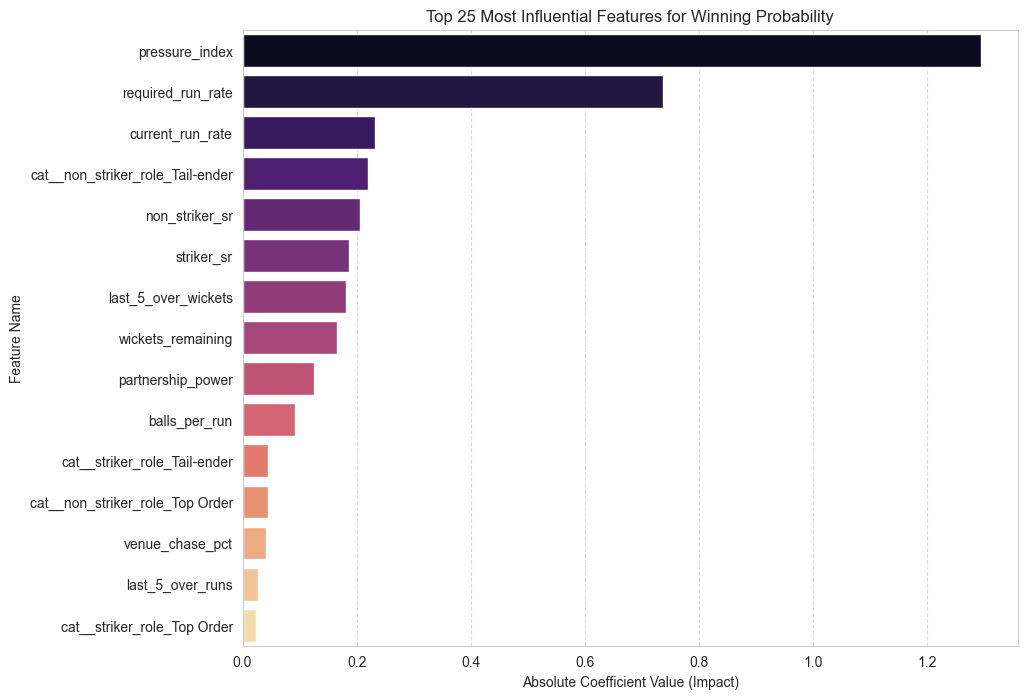

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_feature_names = pipe.named_steps['step1'].get_feature_names_out()

# 2. Extract coefficients from the Logistic Regression (step2)
coefficients = pipe.named_steps['step2'].coef_[0]

# 3. Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients,
    'Importance': abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# 4. Optional: Clean up names (removes the 'trf__' and 'remainder__' prefixes)
feature_importance['Feature'] = feature_importance['Feature'].str.replace('trf__', '').str.replace('remainder__', '').str.replace('num__', '')

# 5. Plot the top 15 features
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='magma')
plt.title('Top 25 Most Influential Features for Winning Probability')
plt.xlabel('Absolute Coefficient Value (Impact)')
plt.ylabel('Feature Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [61]:
import pickle

# Save the actual tuned model
pickle.dump(pipe, open('pipe_ipl_2nd_innings.pkl', 'wb'))


all_players = sorted(list(sr_map.keys()))

pickle.dump(teams, open('teams_ipl_2nd_innings.pkl', 'wb'))
pickle.dump(venues, open('venues_ipl_2nd_innings.pkl', 'wb'))
pickle.dump(all_players, open('players_ipl_2nd_innings.pkl', 'wb'))
pickle.dump(venue_chase_map, open('venue_chase_ipl_2nd_innings.pkl', 'wb'))
pickle.dump(sr_map, open('sr_lookup_ipl_2nd_innings.pkl', 'wb'))